# Project - Stock Market Prediction
Time series data represents a sequence of data points that are indexed in chronological order. Due to its prevalence, efficiently handling time series data is essential for data analysts and data scientists.

In this notebook, we will explore and analyze data from the stock market, focusing on technology stocks like Apple, Amazon, Google, and Microsoft. We will learn how to use yfinance to fetch stock information and visualize different aspects using Seaborn and Matplotlib. Our analysis will include evaluating the risk of a stock based on its historical performance, and we will attempt to predict future stock prices using the Long Short Term Memory (LSTM) method.

Throughout the notebook, we will address the following questions:

1.) How has the stock's price evolved over time?

2.) What is the average daily return of the stock?

3.) How does the moving average of the various stocks fluctuate?

4.) What is the correlation between different stocks?

5.) What is the level of risk associated with investing in a particular stock?

6.) Can we make predictions about future stock behavior, specifically the closing price of APPLE Inc, using LSTM?


# Getting the Data

In [5]:
#We will get our stock data from the Yahoo Finance website.we will be using yfinance library.
!pip install -q yfinance

# 1. How has the stock's price evolved over time?
In this segment, we will cover the process of retrieving stock information using pandas and explore fundamental attributes of a stock.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-07-14,134.059998,136.649994,134.059998,134.679993,134.679993,54388100,AMAZON
2023-07-17,134.559998,135.619995,133.210007,133.559998,133.559998,48450200,AMAZON
2023-07-18,132.710007,133.860001,131.350006,132.830002,132.830002,54969100,AMAZON
2023-07-19,133.389999,135.990005,132.529999,135.360001,135.360001,54531000,AMAZON
2023-07-20,134.070007,134.789993,129.330002,129.960007,129.960007,59820600,AMAZON
2023-07-21,131.339996,131.369995,128.419998,130.000000,130.000000,133265000,AMAZON
2023-07-24,130.309998,131.660004,128.350006,128.800003,128.800003,45591100,AMAZON
2023-07-25,129.309998,129.580002,128.529999,129.130005,129.130005,39236700,AMAZON
2023-07-26,126.510002,129.080002,126.110001,128.149994,128.149994,53910100,AMAZON


Upon reviewing the data content, it becomes evident that the data is numeric, and the date serves as the index for the data. It is also noticeable that the records do not include weekends, leading to gaps in the data.

Descriptive statistics are calculations that provide a summary of the dataset's central tendency, dispersion, and distribution shape. These statistics are computed while excluding any NaN (Not a Number) values present in the dataset.

In [4]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,158.285060,160.101594,156.722072,158.495299,158.130165,7.079214e+07
std,17.216704,17.023558,17.540421,17.290817,17.425827,2.317283e+07
min,126.010002,127.769997,124.169998,125.019997,124.656975,3.145820e+07
25%,145.815002,147.340004,144.014999,145.919998,145.470390,5.396660e+07
50%,154.789993,157.089996,153.369995,155.000000,154.602554,6.762210e+07
75%,170.330002,171.610001,169.019997,170.775002,170.092178,8.142645e+07
max,196.020004,198.229996,193.320007,195.100006,195.100006,1.647624e+08


Solving environment: ...working... done

# All requested packages already installed.



# About the Data

In [7]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-07-28 to 2023-07-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


# Closing Price
The closing price of a stock refers to the final price at which the stock is traded during the regular trading day. It serves as the standard benchmark employed by investors to monitor the stock's performance over a specific period of time.

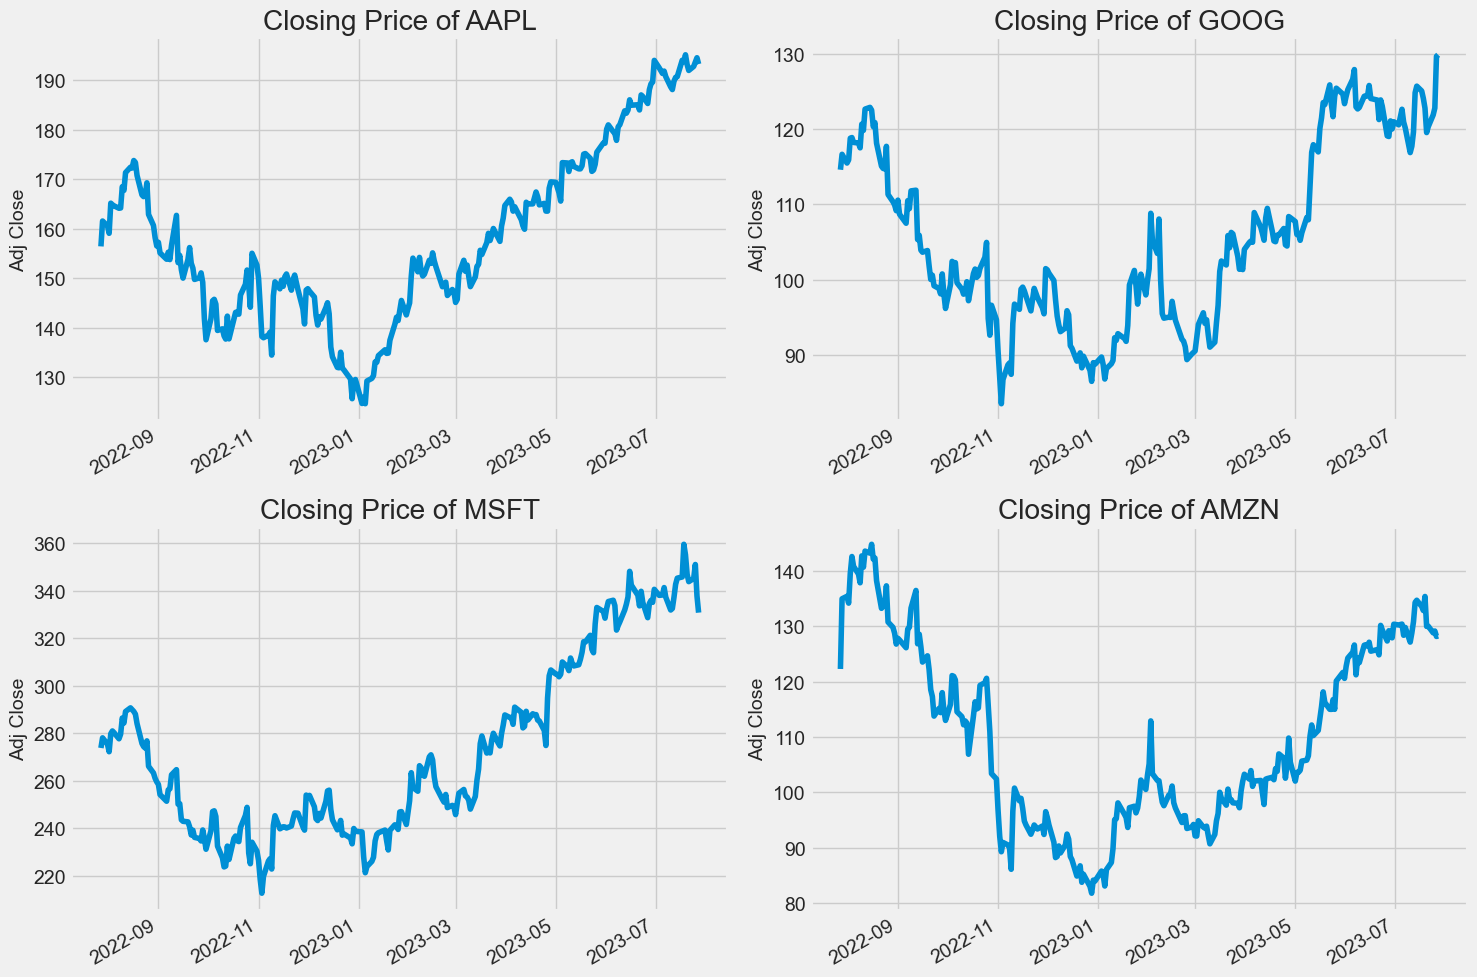

In [8]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

# Volume of Sales
Volume, in the context of the financial markets, represents the quantity of an asset or security that is exchanged or traded within a given timeframe, typically during a day. For example, stock trading volume denotes the total number of shares of a security traded between its opening and closing prices for that particular day.

Trading volume, along with its fluctuations over time, holds significant importance for technical traders. It serves as a vital input in their analysis, helping them make informed decisions and predictions about market trends and potential price movements.

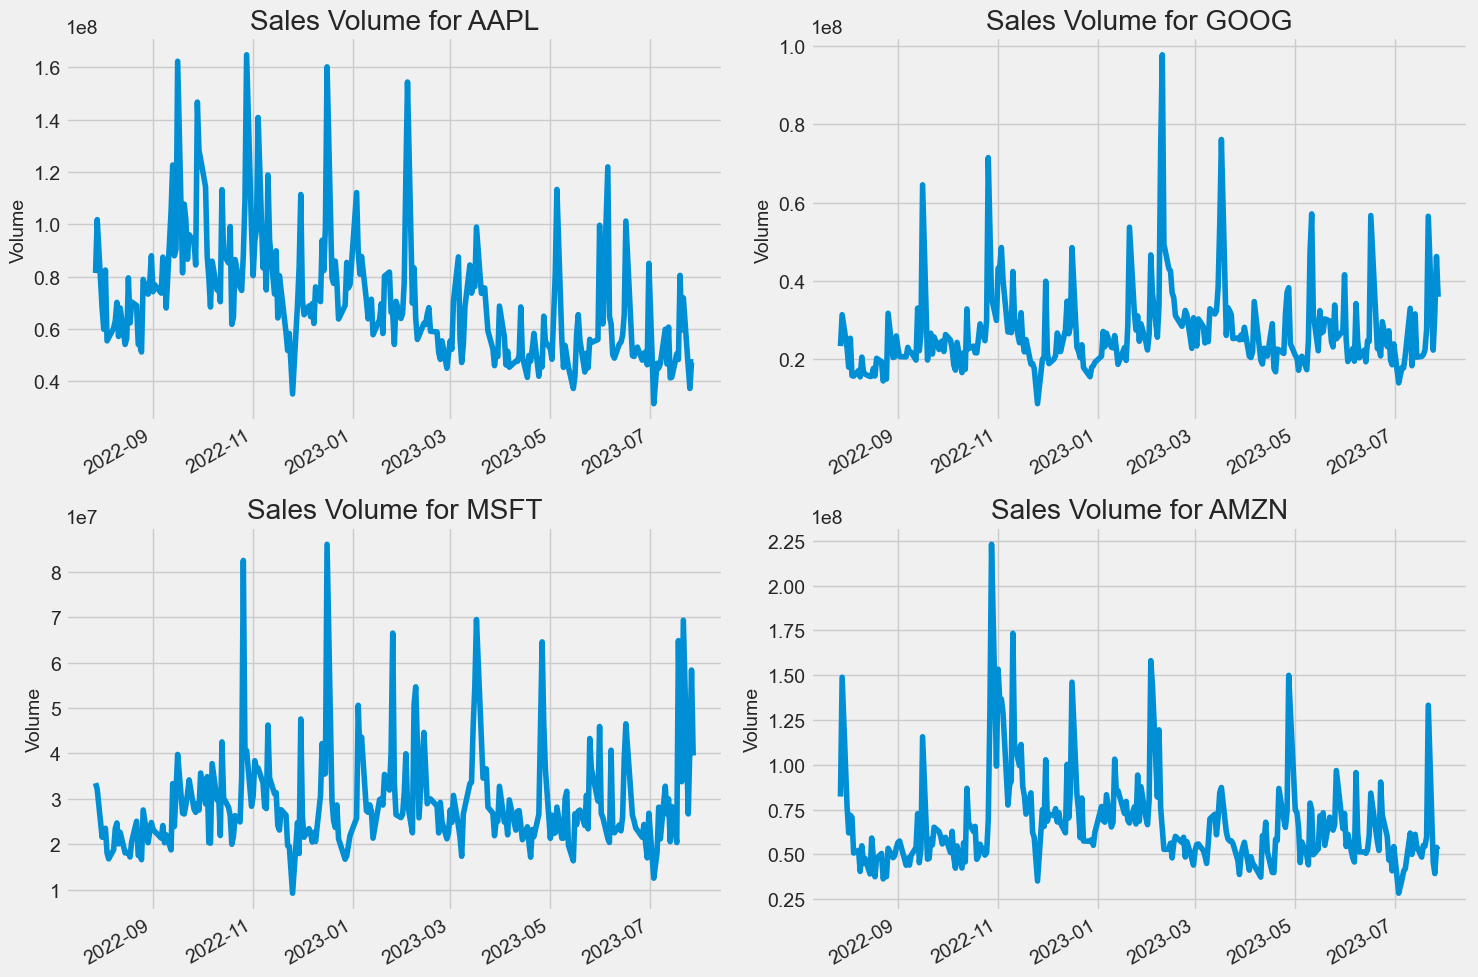

In [9]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Having observed the visualizations for the closing price and daily trading volume, let's proceed with calculating the moving average for the stock.

# 2. What is the average daily return of the stock?
The moving average (MA) is a straightforward technical analysis tool used to smoothen price data by computing a continuously updated average price. This average is calculated over a designated period of time, such as 10 days, 20 minutes, 30 weeks, or any chosen timeframe preferred by the trader. The moving average helps traders identify trends and potential reversals in the market by reducing noise and highlighting the underlying price direction.

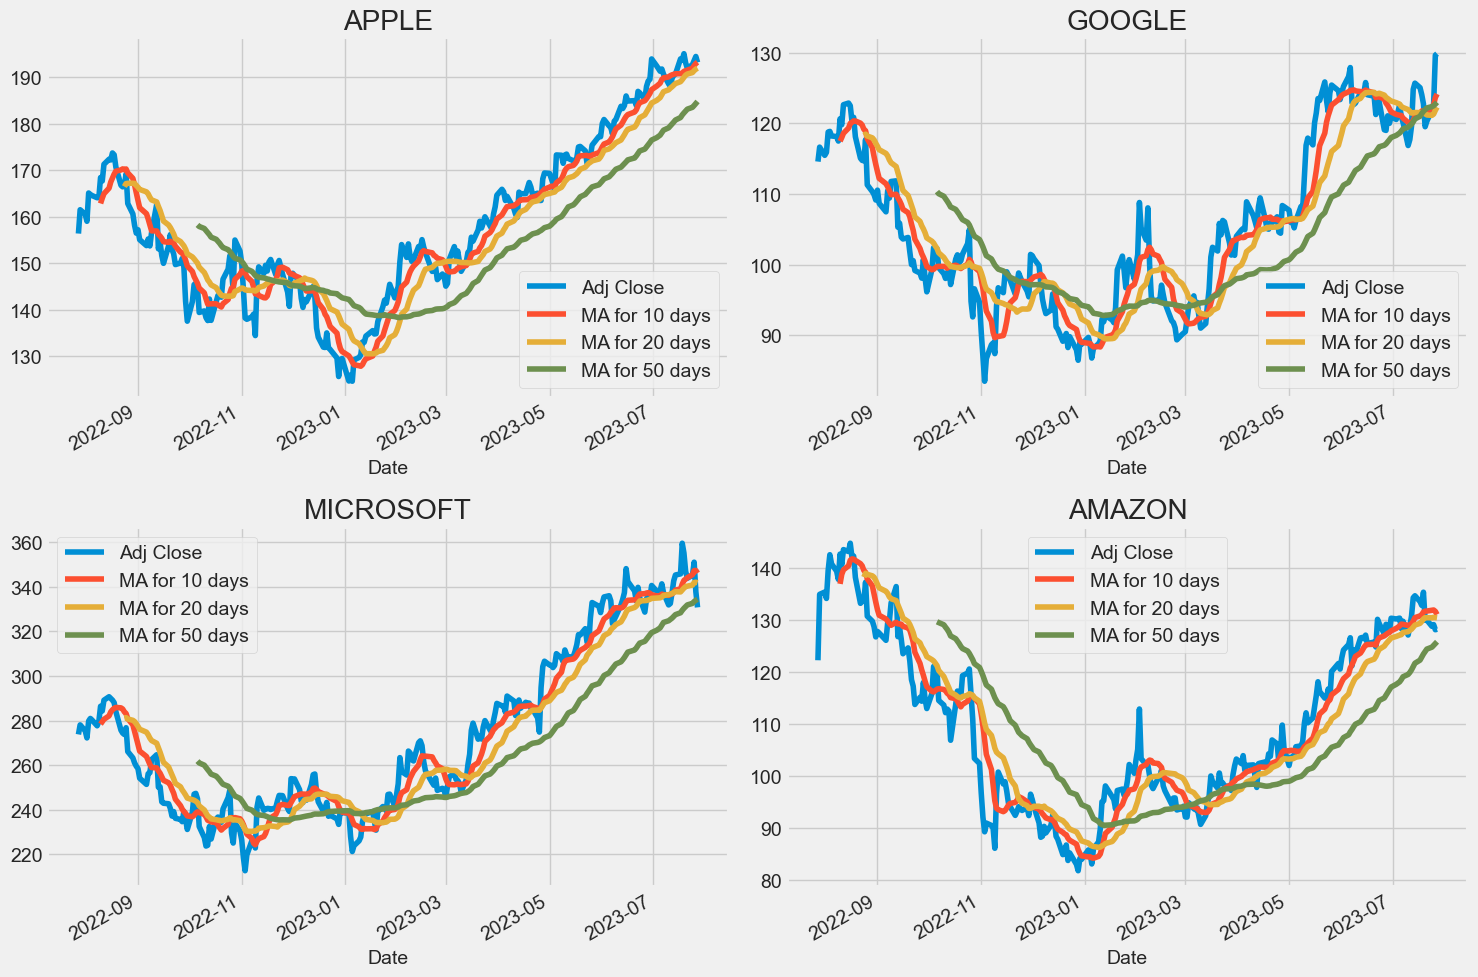

In [10]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. How does the moving average of the various stocks fluctuate?
Certainly, to analyze the risk of the stock more comprehensively, we will delve deeper by examining the daily changes in the stock rather than just its absolute values. To achieve this, we will utilize pandas to fetch the daily returns for the Apple stock. By calculating the daily returns, we can better assess the stock's volatility and fluctuations in value over time. Let's proceed with retrieving the daily returns for the Apple stock.

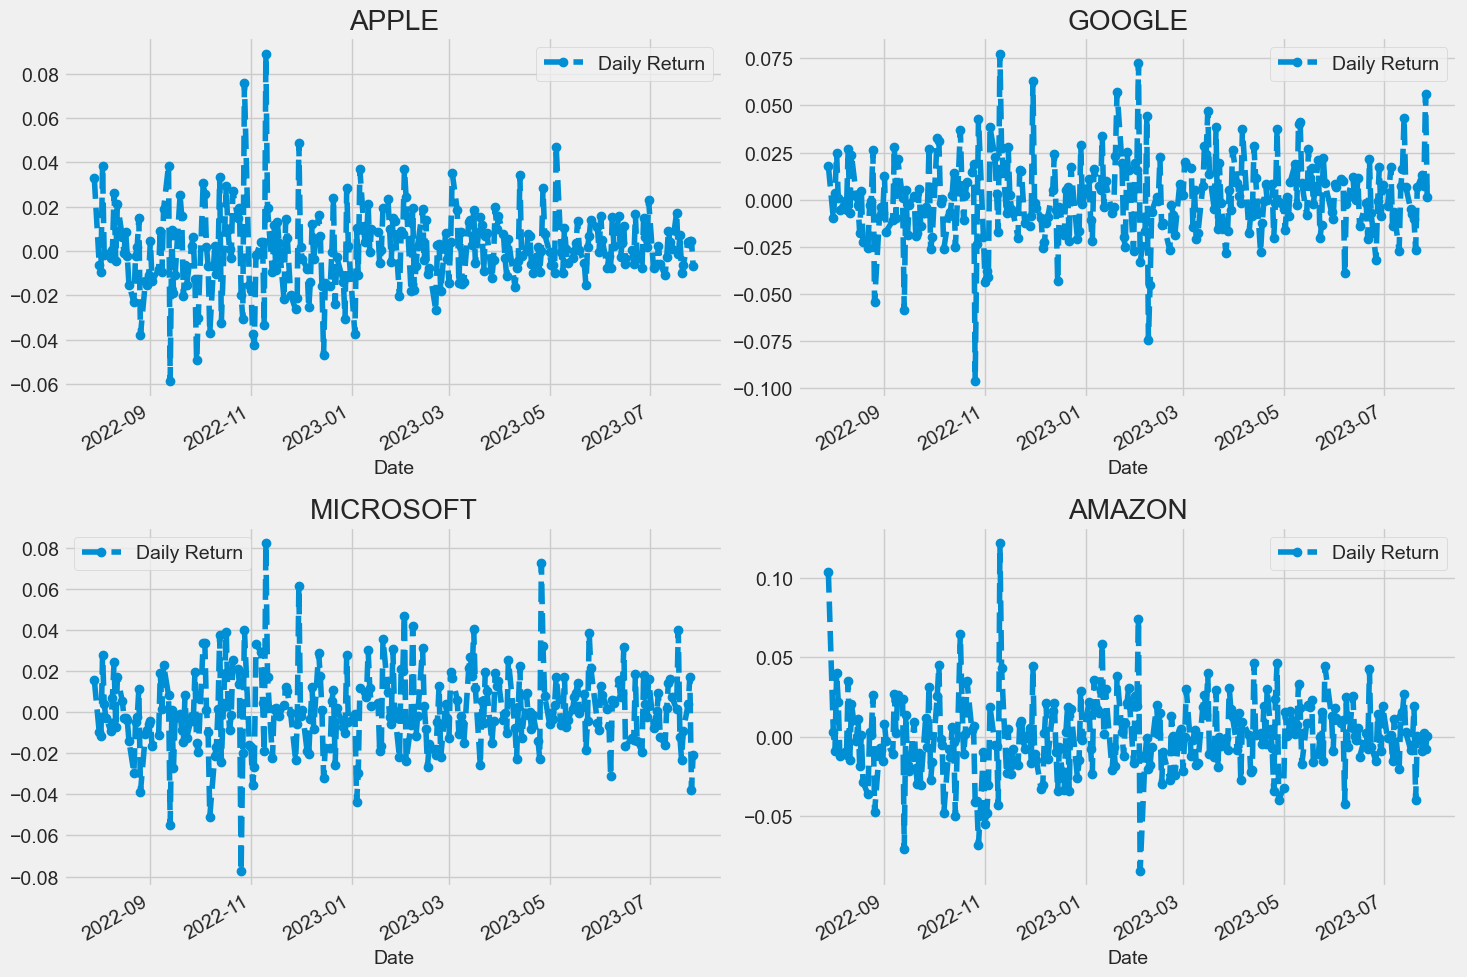

In [11]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Excellent! To gain an overall understanding of the average daily return, we will create a histogram using seaborn and incorporate a kernel density estimation (KDE) plot on the same figure. This combination will provide a visual representation of the distribution of daily returns for the Apple stock. By overlaying the histogram and KDE plot, we can gain insights into the density and pattern of the average daily returns. Let's proceed with generating the combined visualization using seaborn.

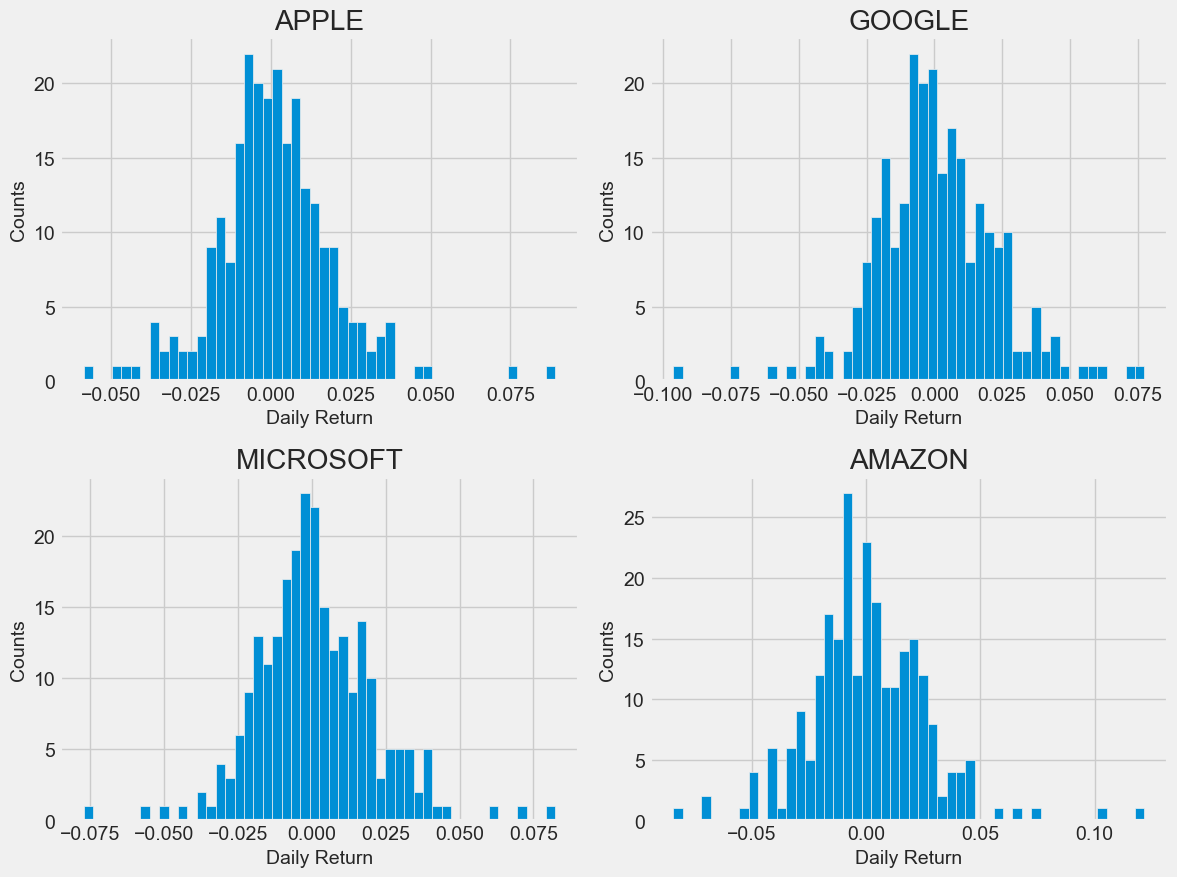

In [12]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4 What is the correlation between different stocks?

Absolutely! Correlation is a statistical measure that quantifies the extent to which two variables are related to each other. Its value lies within the range of -1.0 to +1.0. A correlation value closer to +1.0 indicates a strong positive association between the variables, while a value closer to -1.0 suggests a strong negative association. A correlation of 0 implies no linear relationship between the variables. It is essential to note that correlation only measures association and does not establish causation. The observed association could be due to other external factors.

Now, if we wish to analyze the returns of all the stocks in our list, we can construct a DataFrame that includes the 'Close' columns from each of the stocks' DataFrames. By merging the 'Close' columns of all the stocks into a single DataFrame, we can conveniently perform further analyses and comparisons. Let's proceed with building this combined DataFrame with the 'Close' columns for all the stocks.

In [13]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-07-28,NaN,NaN,NaN,NaN
2022-07-29,0.032793,0.103615,0.017890,0.015665
2022-08-01,-0.006153,0.003260,-0.009945,-0.009724
2022-08-02,-0.009287,-0.009085,0.003637,-0.011474
2022-08-03,0.038248,0.039952,0.024849,0.027836


Certainly! When comparing the daily percentage return of a stock to itself, we are essentially checking the correlation between the stock's returns and its own historical returns. This comparison can provide insights into the stock's volatility and how closely its daily returns are related over time.

Let's proceed with comparing a stock to itself, calculating the correlation between its daily percentage returns and its historical daily percentage returns. This will give us an initial understanding of how closely the stock's returns are correlated with its own past performance.

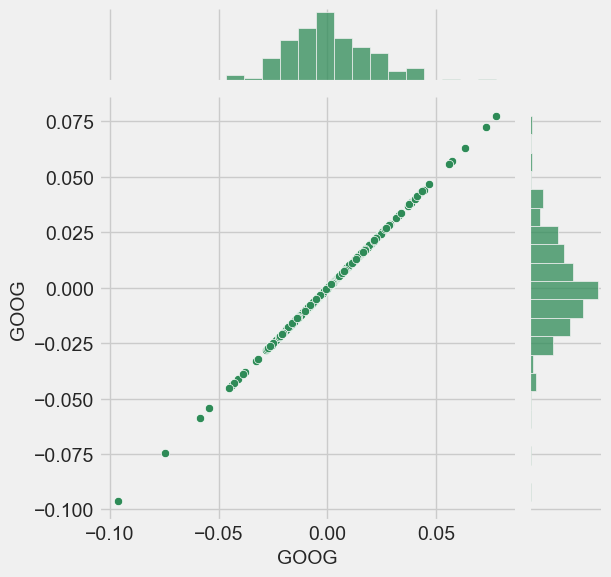

In [14]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

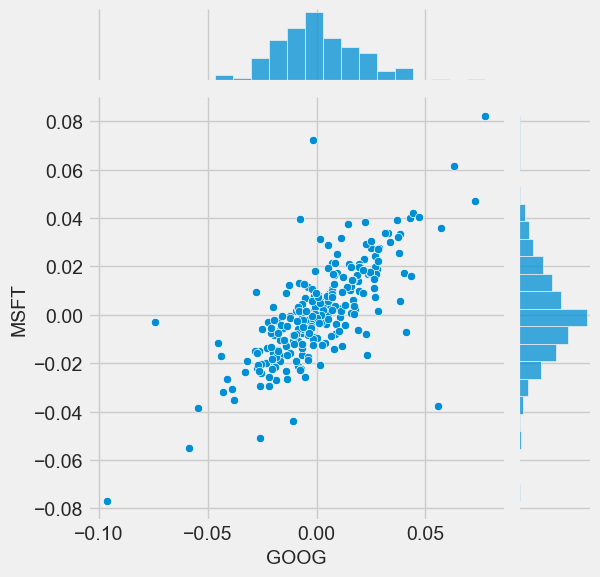

In [15]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

Exactly! When two stocks are perfectly and positively correlated, a linear relationship between their daily return values will be evident. This implies that the two stocks tend to move in the same direction, with similar percentage changes on a daily basis.

With the help of seaborn (sns) and pandas, we can efficiently conduct this comparison analysis for all possible combinations of stocks in our technology stock ticker list. By utilizing the sns.pairplot() function, we can automatically generate a matrix of scatter plots that display the relationships between the daily percentage returns of each pair of stocks. This visualization will allow us to observe the correlations and interactions among the different technology stocks in the list.

Let's proceed with creating the pairplot to analyze the relationships between the daily returns of the technology stocks. This will provide us with valuable insights into their correlations and potential patterns.

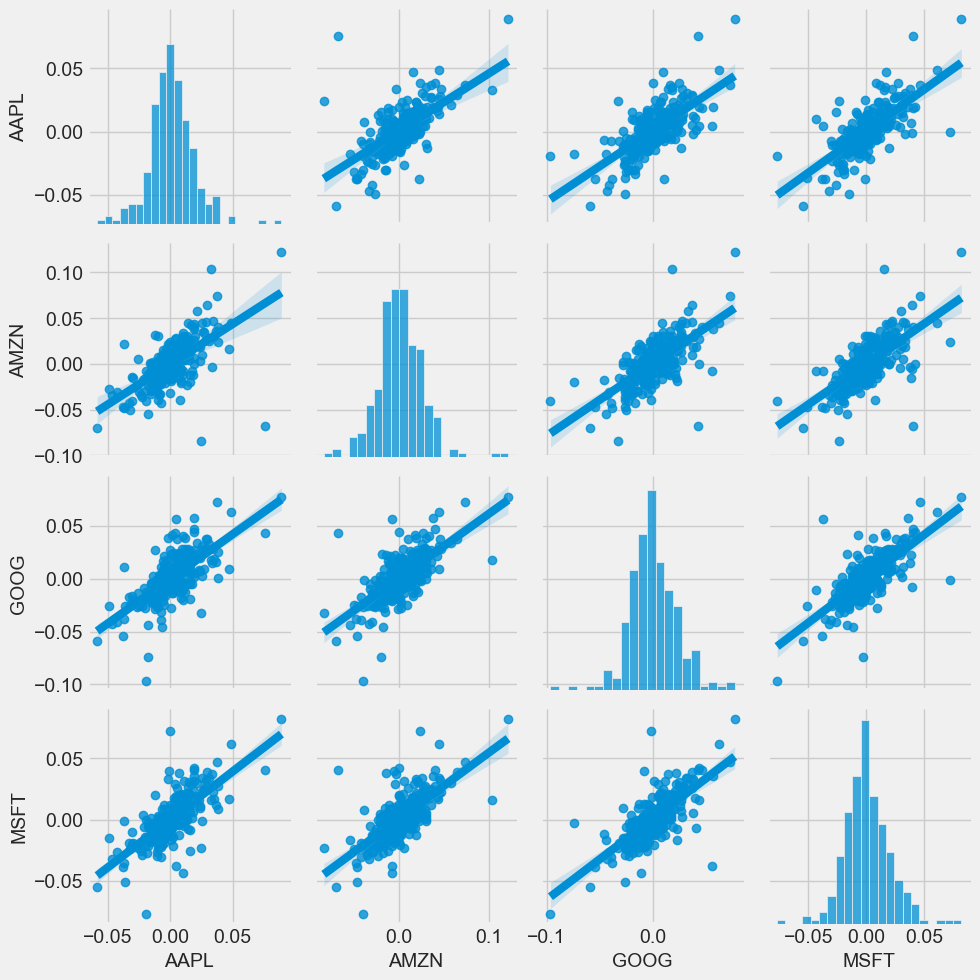

In [16]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Indeed, analyzing the relationships between the daily returns of all the stocks through the pairplot provides valuable insights into their correlations and potential patterns. The interesting correlation between Google and Amazon daily returns may warrant further investigation to understand the underlying dynamics between these two stocks.

While sns.pairplot() offers a convenient way to create the scatter plot matrix, we can also leverage the full capabilities of seaborn by using sns.PairGrid(). This grants us complete control over the figure, allowing us to customize the type of plots in the diagonal, upper triangle, and lower triangle of the matrix. This flexibility enables us to explore the data more deeply and gain a comprehensive understanding of the relationships between the technology stocks.

Below is an example demonstrating the utilization of sns.PairGrid() to achieve this more customizable and insightful result. With sns.PairGrid(), we can conduct further analyses and tailor the visualizations to suit our specific needs and research questions.

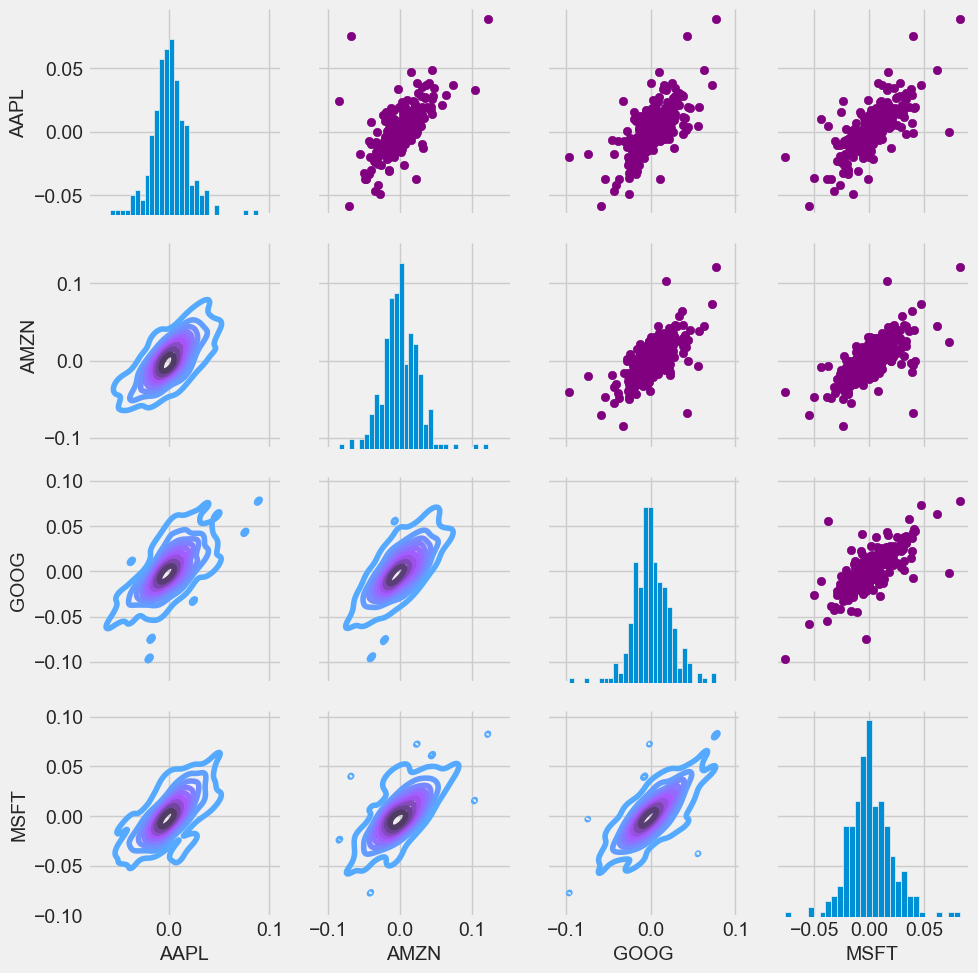

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

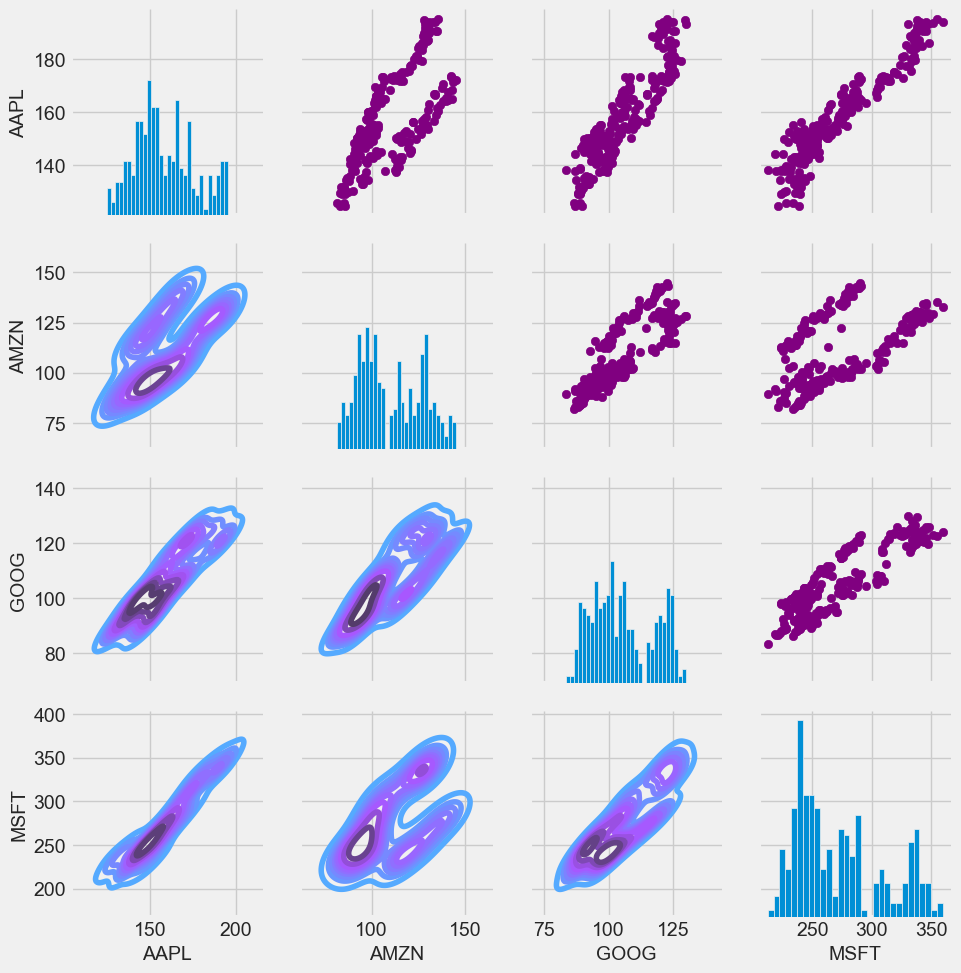

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Absolutely! A correlation plot provides actual numerical values for the correlations between the daily return values of the stocks. This plot offers a clear and concise representation of the strength and direction of the relationships between the different technology stocks.

Additionally, comparing the closing prices of the stocks can unveil interesting relationships between them, such as the correlation between Microsoft and Apple. A correlation plot can provide a more comprehensive view of these relationships by displaying correlation coefficients for all possible pairs of stocks.

By combining visual analysis with numerical correlations, we can gain deeper insights into the interconnections and dependencies among the technology stocks in the list. This information can be valuable for making informed investment decisions and understanding the dynamics of the market.

Let's proceed with creating a correlation plot to examine the numerical values of correlations between the daily return values of the stocks and explore any interesting relationships between them, particularly focusing on Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

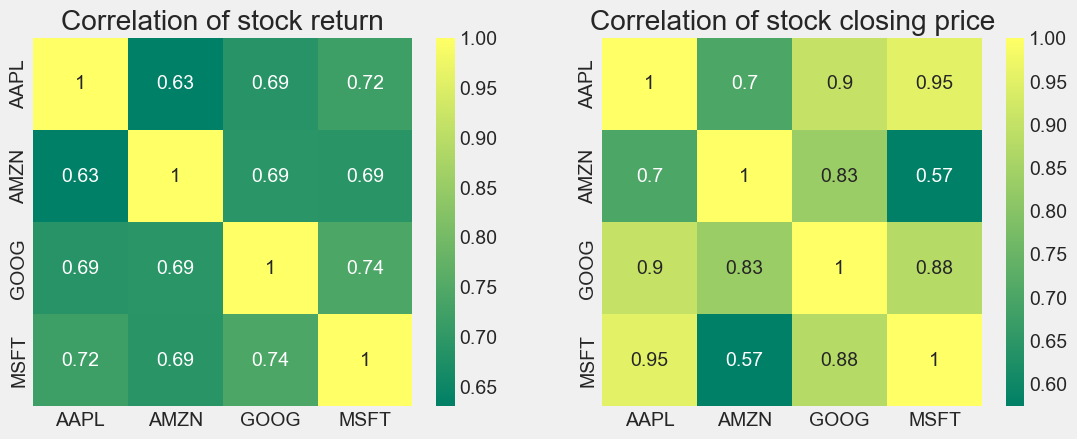

In [19]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5 What is the level of risk associated with investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

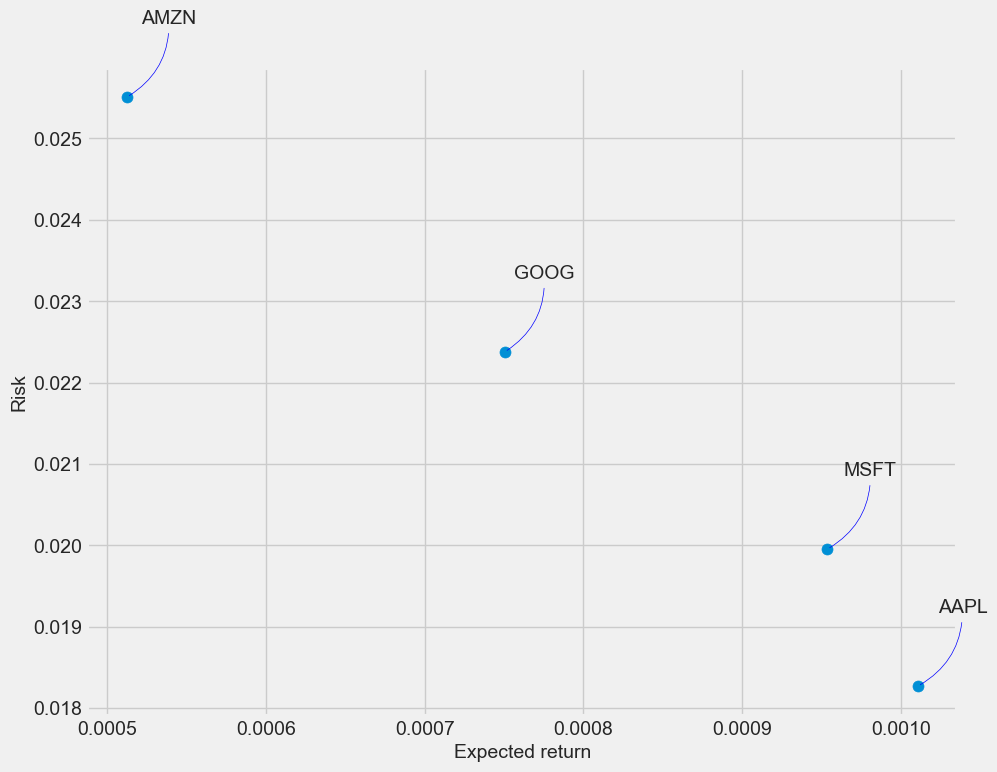

In [20]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Can we make predictions about future stock behavior, specifically the closing price of APPLE Inc, using LSTM?:

In [21]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482925,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550011,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689341,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821994,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801656,394024400
...,...,...,...,...,...,...
2023-07-21,194.100006,194.970001,191.229996,191.940002,191.940002,71917800
2023-07-24,193.410004,194.910004,192.250000,192.750000,192.750000,45377800
2023-07-25,193.330002,194.440002,192.919998,193.619995,193.619995,37283200


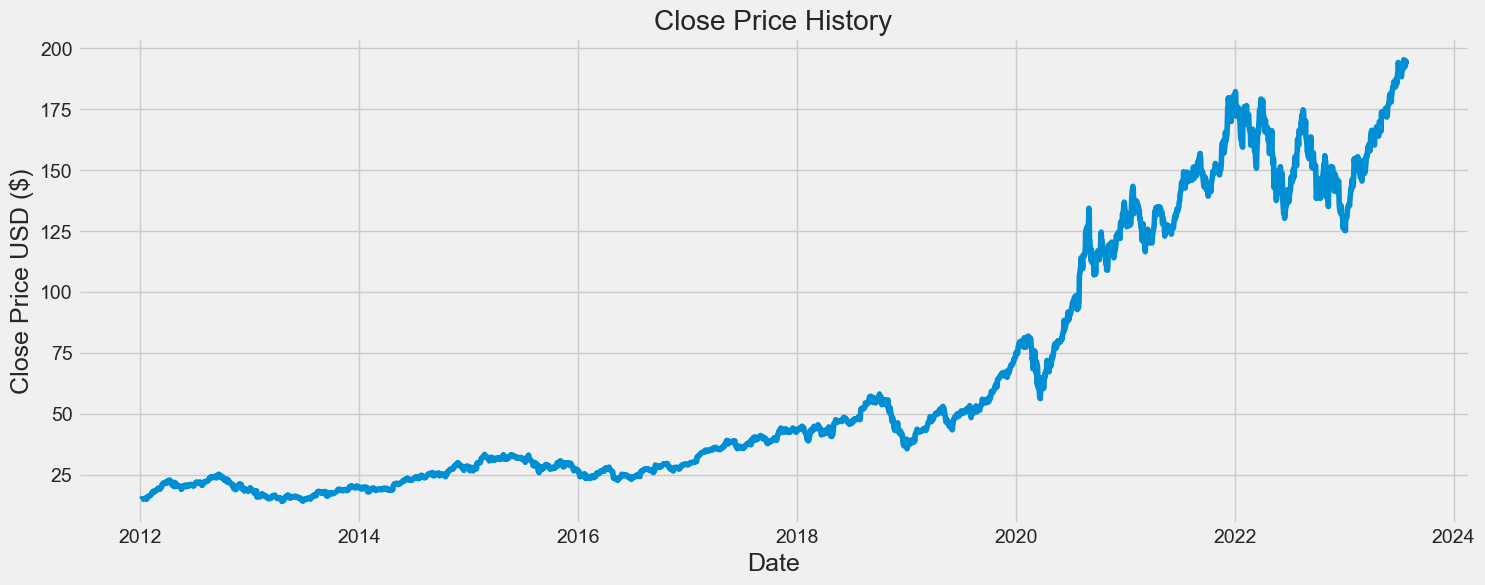

In [22]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [23]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2765

In [24]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00408101],
       [0.00451671],
       [0.00542163],
       ...,
       [0.99183003],
       [0.99668784],
       [0.98962198]])

In [25]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00408101, 0.00451671, 0.00542163, 0.00628318, 0.00615109,
       0.00644879, 0.00631275, 0.00608406, 0.00577256, 0.00673663,
       0.00760606, 0.00733794, 0.00586916, 0.0072709 , 0.00589085,
       0.01106605, 0.01066584, 0.01118828, 0.01231795, 0.01300206,
       0.01294489, 0.01273394, 0.01363295, 0.01447872, 0.01543688,
       0.01698451, 0.02023552, 0.0202848 , 0.02209465, 0.02344709,
       0.0211227 , 0.02201775, 0.02200001, 0.02450974, 0.02415289,
       0.02481334, 0.02600019, 0.02666065, 0.02856315, 0.02994911,
       0.03034932, 0.03048931, 0.02811956, 0.02754782, 0.0276326 ,
       0.0298604 , 0.03048734, 0.03183388, 0.03500799, 0.03924278,
       0.03845024, 0.03845221, 0.04151396, 0.04247211, 0.04178996,
       0.04116697, 0.04051835, 0.0426732 , 0.04415183, 0.04477088])]
[0.04324099061358447]

[array([0.00408101, 0.00451671, 0.00542163, 0.00628318, 0.00615109,
       0.00644879, 0.00631275, 0.00608406, 0.00577256, 0.00673663,
       0.00760606, 0.00733794, 0.00

In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2705/2705 [==============================] - 136s 47ms/step - loss: 0.0010


In [33]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 3s 70ms/step


5.628641616252704

C:\Users\Admin\AppData\Local\Temp\ipykernel_5000\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


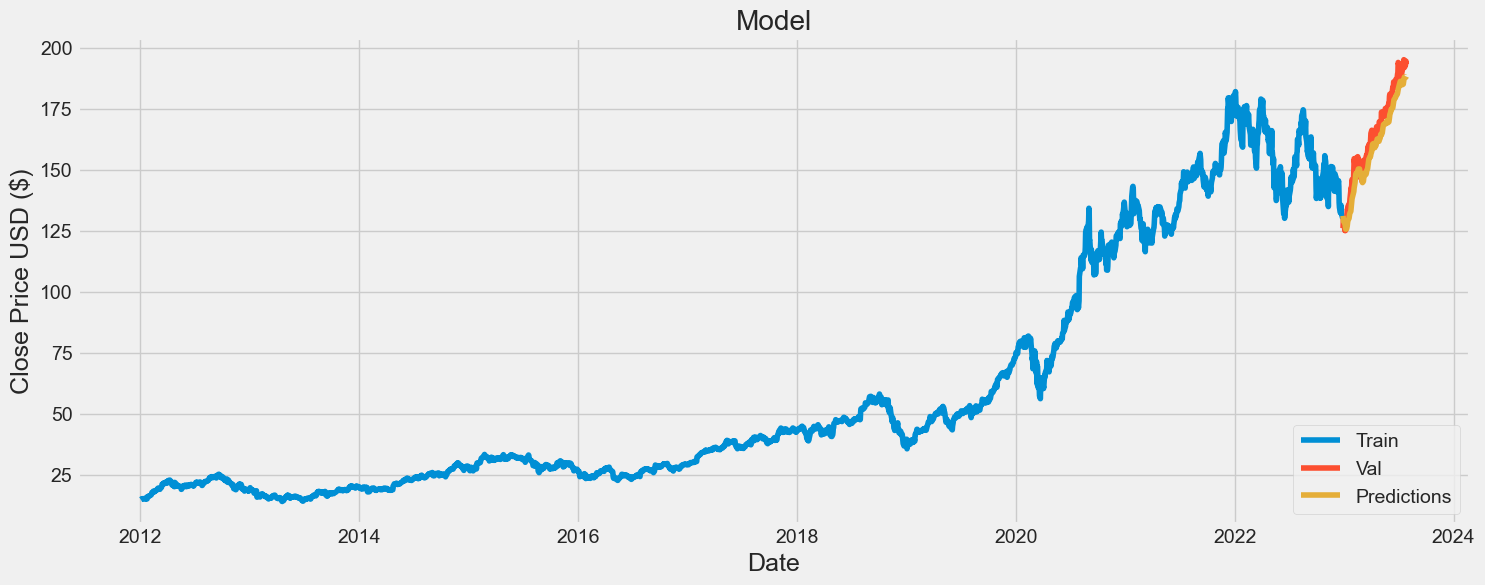

In [34]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [35]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-12-28,126.040001,131.055283
2022-12-29,129.610001,129.534073
2022-12-30,129.929993,128.700836
2023-01-03,125.070000,128.317139
2023-01-04,126.360001,127.307442
...,...,...
2023-07-21,191.940002,187.998306
2023-07-24,192.750000,187.925797
2023-07-25,193.619995,187.846695
